# CO2 emissions prediction - Multiple linear regression

---

Using this database we intend to predict the emissions of CO2 for 2014 car models.

Multiple linear regression is used and obtaining score = 0.89

---

In [291]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [292]:
# Loading data as panda dataframe
df = pd.read_csv('FuelConsumption.csv')

In [293]:
# Inspecting the data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [294]:
df.shape

(1067, 13)

In [295]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [296]:
df['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [297]:
df['TRANSMISSION'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [298]:
df['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [299]:
df['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [300]:
df['MODEL'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD',
       'TSX', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH',
       'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO',
       'A6 QUATTRO', 'A6 QUATTRO TDI CLEAN DIESEL', 'A7 QUATTRO',
       'A7 QUATTRO TDI CLEAN DIESEL', 'A8', 'A8 TDI CLEAN DIESEL', 'A8L',
       'A8L TDI CLEAN DIESEL', 'ALLROAD QUATTRO', 'Q5', 'Q5 HYBRID',
       'Q5 TDI CLEAN DIESEL', 'Q7', 'Q7 TDI CLEAN DIESEL', 'R8',
       'R8 SPYDER', 'RS5', 'RS5 CABRIOLET', 'RS7', 'S4', 'S5',
       'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO',
       'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO',
       'CONTINENTAL GT', 'CONTINENTAL GT CONVERTIBLE',
       'CONTINENTAL GT SPEED CONVERTIBLE', 'CONTINENTAL GTC',
       'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE',
       '328d xDRIVE TOURING', '328i', '328i xDRIVE',
       '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
 

In [301]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [302]:
# Data show no NaN value, therefore OK to continue
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [303]:
# We will drop columns that we see have so many categorization values in relation to the number of events/rows we have.
# Plus some of those parameters are likely to bring little/redundant info to build the model.
columns_drop = ['MAKE','MODEL','VEHICLECLASS','MODELYEAR','TRANSMISSION']
df.drop(columns = columns_drop, inplace = True)

In [304]:
df.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [305]:
# Transforming Categorical features to Numerical

for col_name in df.columns:
    
    if (df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

# Afterwards inspecting resulting dataframe
df.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,3,9.9,6.7,8.5,33,196
1,2.4,4,3,11.2,7.7,9.6,29,221
2,1.5,4,3,6.0,5.8,5.9,48,136
3,3.5,6,3,12.7,9.1,11.1,25,255
4,3.5,6,3,12.1,8.7,10.6,27,244


In [306]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.060869,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.127959,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELTYPE,0.060869,0.127959,1.000000,-0.128841,-0.178439,-0.148167,0.007106,0.075167
FUELCONSUMPTION_CITY,0.832225,0.796473,-0.128841,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,-0.178439,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,-0.148167,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,0.007106,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.075167,0.898039,0.861748,0.892129,-0.906394,1.000000


In [307]:
# We drop highly correlated features
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features that are so much correlated, and therefore would be bringing redundant information
df.drop(to_drop, axis=1, inplace=True)

# Now we want to select main features correlated with dependent variable CO2EMISSIONS
# Correlation with output variable
corr_matrix = df.corr().abs()
corr_matrix_target = abs(corr_matrix["CO2EMISSIONS"])

# Selecting highly correlated features
relevant_features = corr_matrix_target[corr_matrix_target > 0.2]
relevant_features

ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB_MPG    0.906394
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

In [308]:
# Based on the above information we build the df_model dataframe that will contain the relevant feature + the feature we'd like to predict CO2EMISSIONS
df_model = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

Average variance score on 25 random splits =  0.886


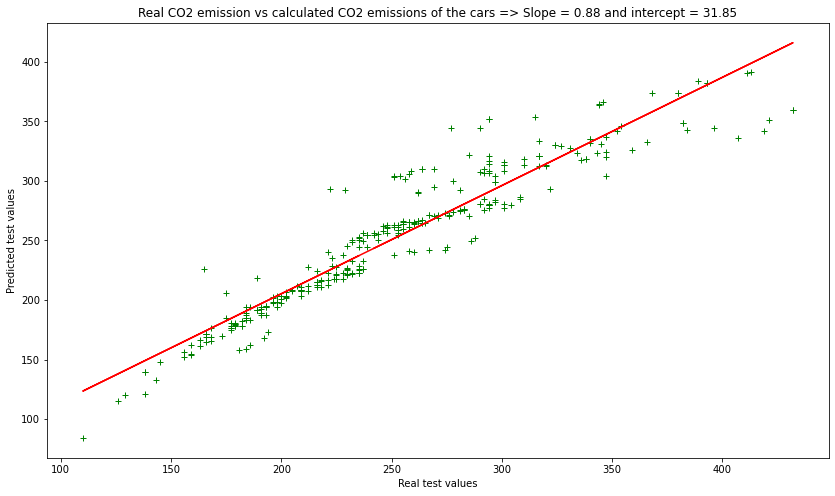

In [318]:
# Loading modeling methods to build our multiple linear regression model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

# We get the data from the dataframe df_model
data = df_model.values

# Normalizing data
dataNorm = StandardScaler().fit(data).transform(data)

# Distinguishing between feature and predicted values
X = dataNorm[:,0:dataNorm.shape[1]-1]
y = data[:,dataNorm.shape[1]-1]

# As follows we build the model, and will split the data 25 times to proceed with the model score calculation.
# Finally we will bring provide an average variance score on 25 random splits. The closer to 1, the best.
score = [];

for i in range(0,25):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True);

    lr = LinearRegression().fit(X_train,y_train)

    value = lr.score(X_test,y_test) # Explained variance score: 1 is perfect prediction
    
    score.append(value)

print('Average variance score on 25 random splits = ', np.round(np.mean(score),decimals = 3))

# We calculate predicted values for 1 split
y_hat = lr.predict(X_test)

# Visualizing model prediction and real values to have an idea on how closer we are.
# Clearly, the best scenario would be to have a line y = x
plt.rcParams['figure.figsize'] = (14,8)

plt.plot(y_test,y_hat,'g+');
plt.xlabel('Real test values')
plt.ylabel('Predicted test values')
plt.title('Real CO2 emission vs calculated CO2 emissions of the cars => '+'Slope = '+str(np.round(m,decimals = 2))+' and intercept = '
          +str(np.round(b,decimals = 2)))

m, b = np.polyfit(y_test,y_hat,1)
plt.plot(y_test, m*y_test + b,'r')
plt.show()